In [112]:
# Experimental Data organisation and recording program
# Author: cnm13ryan
# Date created: 19/10/2022 11:30
# Last modified: 19/10/2022 14:16


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
class Experiment_name:
   
    def __init__(self, exp_name):
        self.exp_name = exp_name;
        self.trials = {};
        self.variables = {};
        self.systems = {};
      
    def add_trials(self, trial):
        self.trials[trial.trial_num] = trial;
    
    def add_variables(self, var):
        self.variables[var.var_name] = var;
    
    def add_systems(self, sys):
        self.systems[sys.sys_name] = sys;
        

In [3]:
class Experiment_trial:
    
    def __init__(self, trial_num, exp_name):
        self.trial_num = trial_num;
        self.description = "";
        exp_name.add_trials(self);
        #print("Added", self.trial_num); 
    
        

In [4]:
class Experiment_sys:
    
    def __init__(self, sys_name, exp_name):
        self.sys_name = sys_name;
        self.description = "";
        exp_name.add_systems(self);
        #print("Added", self.trial_num);
        self.var_dispatch = {};
    

In [5]:
class variables:
    
    def __init__(self, var_name, exp_name, exp_sys):
        self.var_name = var_name;
        self.description = "";
        self.trials = len(exp_name.trials) + 1 ;
        # print(self.trials)
        self.exp_sys = exp_sys;
        self.var_dispatch = {};
        
        exp_name.add_variables(self);
        #print("Added", self.var_name);
        
        self.exp_sys.var_dispatch = dict([(k, 0) for k in range(self.trials)]);
        
    def add_data_to_var(self, exp_name, exp_sys, data, trial_no):
        entries = self.trials;
        
        if trial_no <= entries:
            self.var_dispatch[trial_no] = data;
        else:
            print("Invalid entry number!");
            

In [6]:
def entering_data(obj, exp_name, exp_sys, data_m, no_trial):
    for i in range(no_trial):
        obj.add_data_to_var(exp_name, exp_sys, data_m[i], i);
        

In [7]:
def graph_plot(y_arr, Title, xlabel, ylabel):
    """Graph plotted of one dependent variable"""
    def h(x_arr):
        plt.plot(x_arr, y_arr);
        """
        for i,j in zip(x_arr,y_arr):
            ax.annotate('%s)' %j, xy=(i,j), xytext=(30,0), textcoords='offset points')
            ax.annotate('(%s,' %i, xy=(i,j))
       """
        plt.title(Title);
        plt.xlabel(xlabel);
        plt.ylabel(ylabel);  
        plt.grid();
        plt.show();
        
    fig = plt.figure();
    ax = fig.add_subplot(111);
    return h;


In [8]:
# G28 Dimensional Analysis and Scale Up
DA = Experiment_name("DA");
Sys_1 = Experiment_trial("S1", DA) # 50% NaOH small impellar
Sys_2 = Experiment_trial("S2", DA) # 50% NaOH large impellar
Sys_3 = Experiment_trial("S3", DA) # Glycerol small impellar
Sys_4 = Experiment_trial("S4", DA) # Glycerol large impellar


In [9]:
Torque_s1 = variables("Torque", DA, Sys_1)
Power_s1 = variables("Power", DA, Sys_1)
RPM_s1 = variables("RPM", DA, Sys_1)

Torque_s2 = variables("Torque", DA, Sys_2)
Power_s2 = variables("Power", DA, Sys_2)
RPM_s2 = variables("RPM", DA, Sys_2)

Torque_s3 = variables("Torque", DA, Sys_3)
Power_s3 = variables("Power", DA, Sys_3)
RPM_s3 = variables("RPM", DA, Sys_3)

Torque_s4 = variables("Torque", DA, Sys_4)
Power_s4 = variables("Power", DA, Sys_4)
RPM_s4 = variables("RPM", DA, Sys_4)

In [10]:
# For Sys1 50% NaOH small impellar
Torque_data_m1 = [0.06, 0.07, 0.10, 0.13, 0.16];
RPM_data_m1 = [301, 401, 500, 600, 703];
Power_data_m1 = [4.312, 6.702, 11.938, 18.623, 26.856];


In [11]:
# For Sys2 50% NaOH large impellar
Torque_data_m2 = [0.13, 0.21, 0.31, 0.45, 0.58];
RPM_data_m2 = [300, 400, 501, 600, 693];
Power_data_m2 = [12.375, 26.653, 49.280, 85.671, 127.536];


In [12]:
# For Sys3 Glycerol small impellar
Torque_data_m3 = [0.16, 0.26, 0.38, 0.51, 0.65];
RPM_data_m3 = [302, 401, 502, 601, 692];
Power_data_m3 = [15.332, 33.000, 50.528, 97.256, 142.722];


In [13]:
# For Sys4 Glycerol large impellar
Torque_data_m4 = [0.06, 0.09, 0.11, 0.15, 0.19];
RPM_data_m4 = [301, 400, 499, 599, 697];
Power_data_m4 = [4.312, 8.595, 13.106, 21.453, 31.619];


In [14]:
entering_data(Torque_s1, DA, Sys_1, Torque_data_m1, 5)
entering_data(RPM_s1, DA, Sys_1, RPM_data_m1, 5)
entering_data(Power_s1, DA, Sys_1, Power_data_m1, 5)

entering_data(Torque_s2, DA, Sys_2, Torque_data_m2, 5)
entering_data(RPM_s2, DA, Sys_2, RPM_data_m2, 5)
entering_data(Power_s2, DA, Sys_2, Power_data_m2, 5)

entering_data(Torque_s3, DA, Sys_3, Torque_data_m3, 5)
entering_data(RPM_s3, DA, Sys_3, RPM_data_m3, 5)
entering_data(Power_s3, DA, Sys_3, Power_data_m3, 5)

entering_data(Torque_s4, DA, Sys_4, Torque_data_m4, 5)
entering_data(RPM_s4, DA, Sys_4, RPM_data_m4, 5)
entering_data(Power_s4, DA, Sys_4, Power_data_m4, 5)

In [15]:
# MTD

In [16]:
# MTD Data
df_time = np.array([t*60 for t in range(56) if t % 5 == 0]); # [s]

df_temp = np.array([31.9, 31.7, 31.4, 
                    31.2, 31.0, 30.8, 
                    30.7, 30.5, 30.3, 
               
                    30.1, 30.0, 29.8]); # [°C]

df_position = np.array([16.6, 17.0, 17.3, 
                        17.3, 17.6, 17.7, 
                        18.0, 18.0, 18.3, 
                        18.3, 18.4, 18.5]); # [mm]

df_pos = np.array([p / 1000 for p in df_position]); # [m]



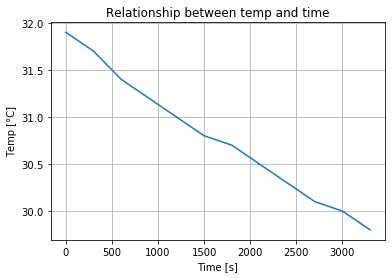

In [17]:
# Relationship between Temperature and Time

graph_plot(df_temp, 
           "Relationship between temp and time", 
           "Time [s]", 
           "Temp [°C]")(df_time)    


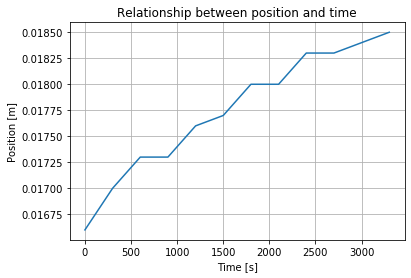

In [18]:
# Relationship between Position and Time

graph_plot(df_pos, 
           "Relationship between position and time", 
           "Time [s]",
           "Position [m]" )(df_time)    

In [19]:
def cal_difference_quotient(t_m, l_m):
    
    def quotient(t_f, t_i, l_f, l_i):
        return (t_f - t_i) / (l_f - l_i);
    
    
    a_m = np.zeros(len(t_m));
    
    for i in range(1, len(t_m)):
        a_m[i] = quotient(t_m[i], t_m[i-1], l_m[i], l_m[i-1]);
    return a_m;


$\dfrac{t}{\Delta L} = \dfrac{t_2 - t_1}{l_2 - l_2}$

In [20]:
dq_m = cal_difference_quotient(df_time, df_position)

/tmp/ipykernel_6633/3257815568.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return (t_f - t_i) / (l_f - l_i);


In [21]:
dq_m

array([   0.,  750., 1000.,   inf, 1000., 3000., 1000.,   inf, 1000.,
         inf, 3000., 3000.])

In [22]:
df_time

array([   0,  300,  600,  900, 1200, 1500, 1800, 2100, 2400, 2700, 3000,
       3300])

In [23]:
df_pos

array([0.0166, 0.017 , 0.0173, 0.0173, 0.0176, 0.0177, 0.018 , 0.018 ,
       0.0183, 0.0183, 0.0184, 0.0185])

In [24]:
df_pos_diff = [p - 0.0166 for p in df_pos]
print(df_pos_diff)

[0.0, 0.00040000000000000105, 0.0006999999999999992, 0.0006999999999999992, 0.0010000000000000009, 0.0011000000000000003, 0.0013999999999999985, 0.0013999999999999985, 0.0017000000000000001, 0.0017000000000000001, 0.0017999999999999995, 0.001899999999999999]


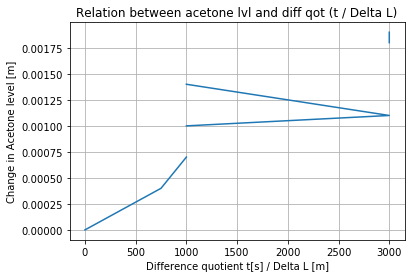

In [25]:
graph_plot(df_pos_diff, 
           "Relation between acetone lvl and diff qot (t / Delta L)",
           "Difference quotient t[s] / Delta L [m]",
           "Change in Acetone level [m]",)(dq_m)

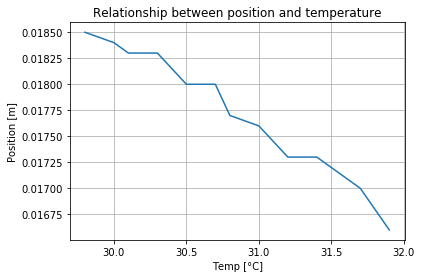

In [26]:
# Relationship between Position and Temperature

graph_plot(df_pos, 
           "Relationship between position and temperature", 
           "Temp [°C]", 
           "Position [m]")(df_temp)    


In [27]:
# from mpl_toolkits.mplot3d.axes3d import Axes3D

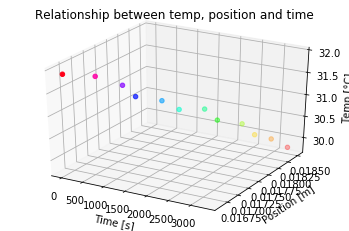

In [28]:
ax = plt.axes(projection='3d');

zdata = df_temp
ydata = df_pos
xdata = df_time
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='hsv')

X_label = 'Time [s]'
Z_label = 'Temp [°C]'
Y_label = 'Position [m]'

ax.set_xlabel(X_label)
ax.set_ylabel(Y_label)
ax.set_zlabel(Z_label)

ax.set_title("Relationship between temp, position and time")

plt.show()

In [29]:
# 3D graph plot

Text(0.5, 0, 'Temp [°C]')

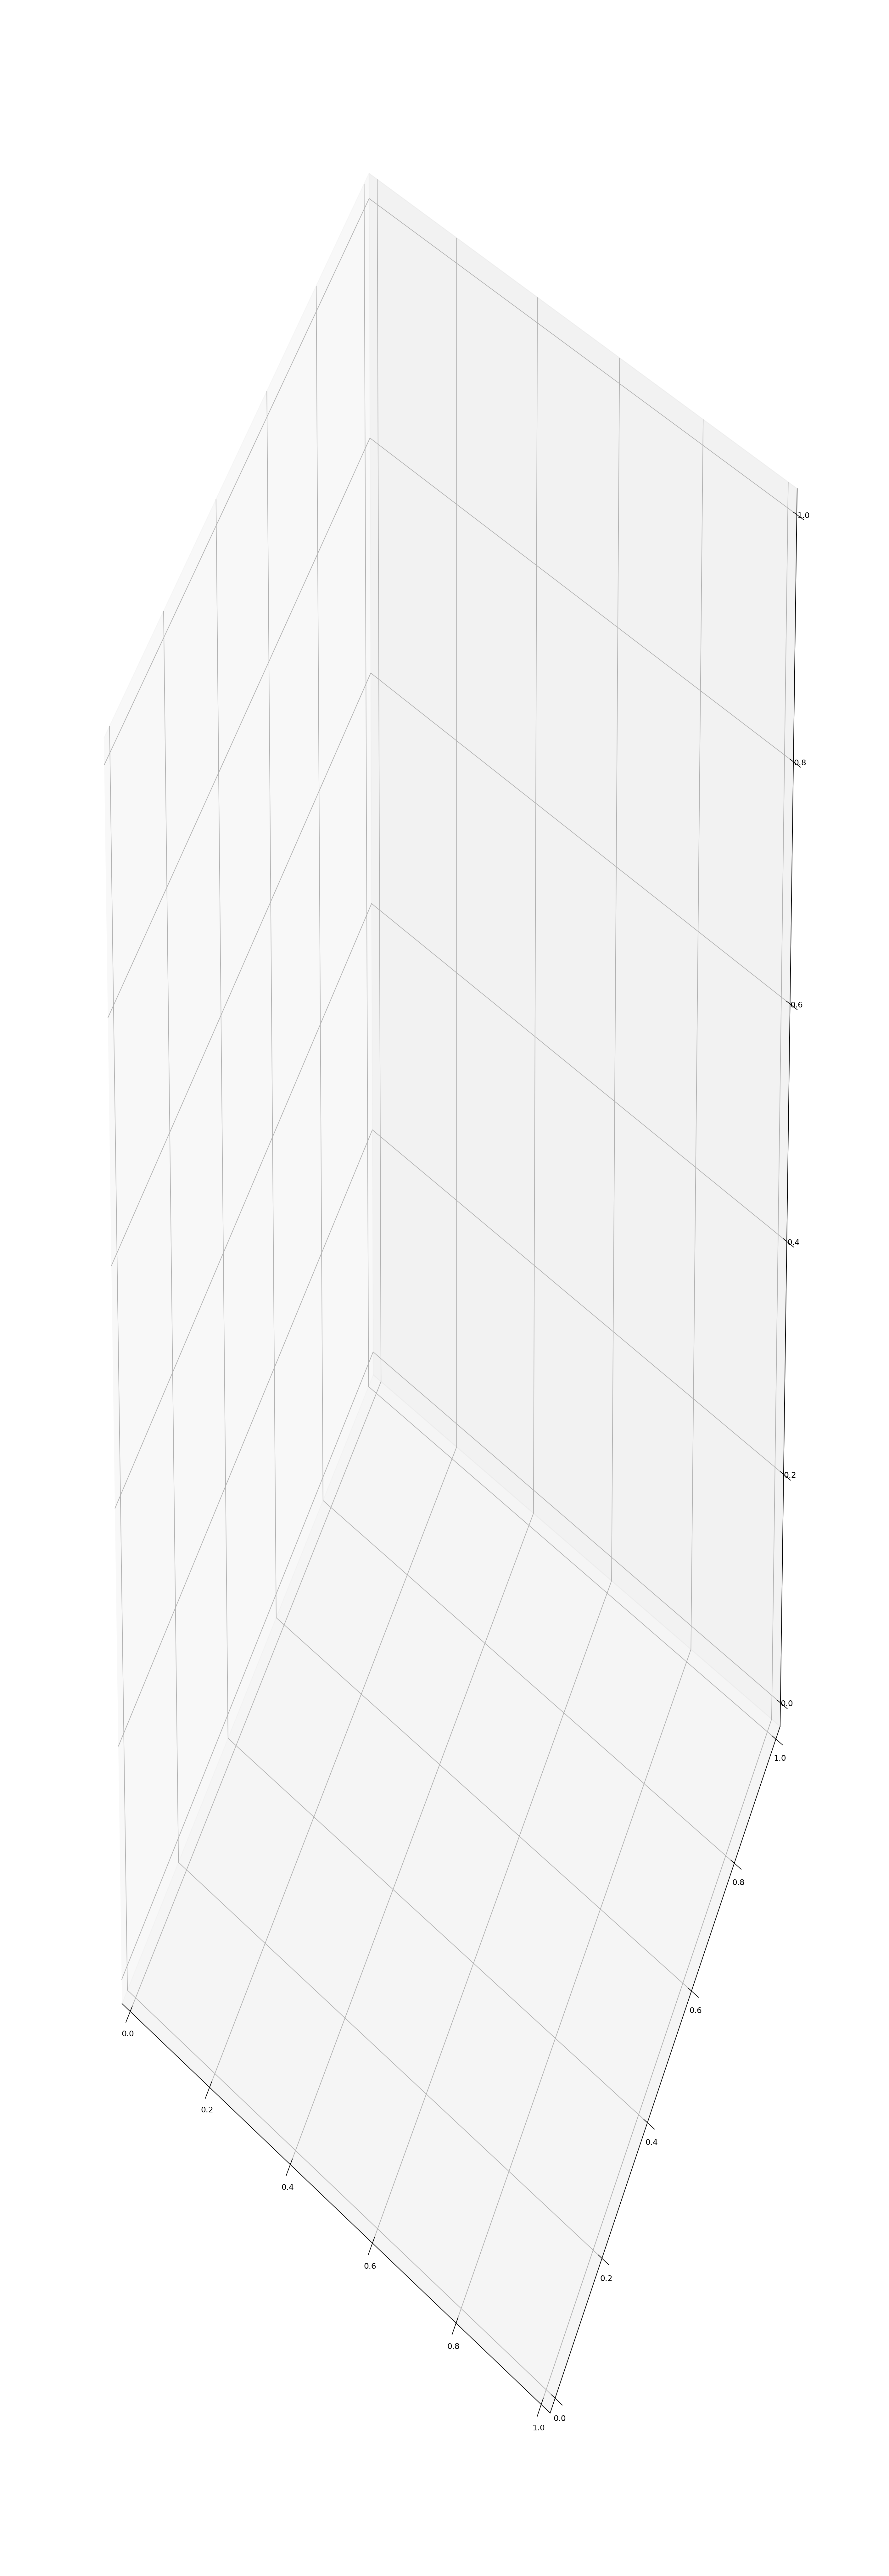

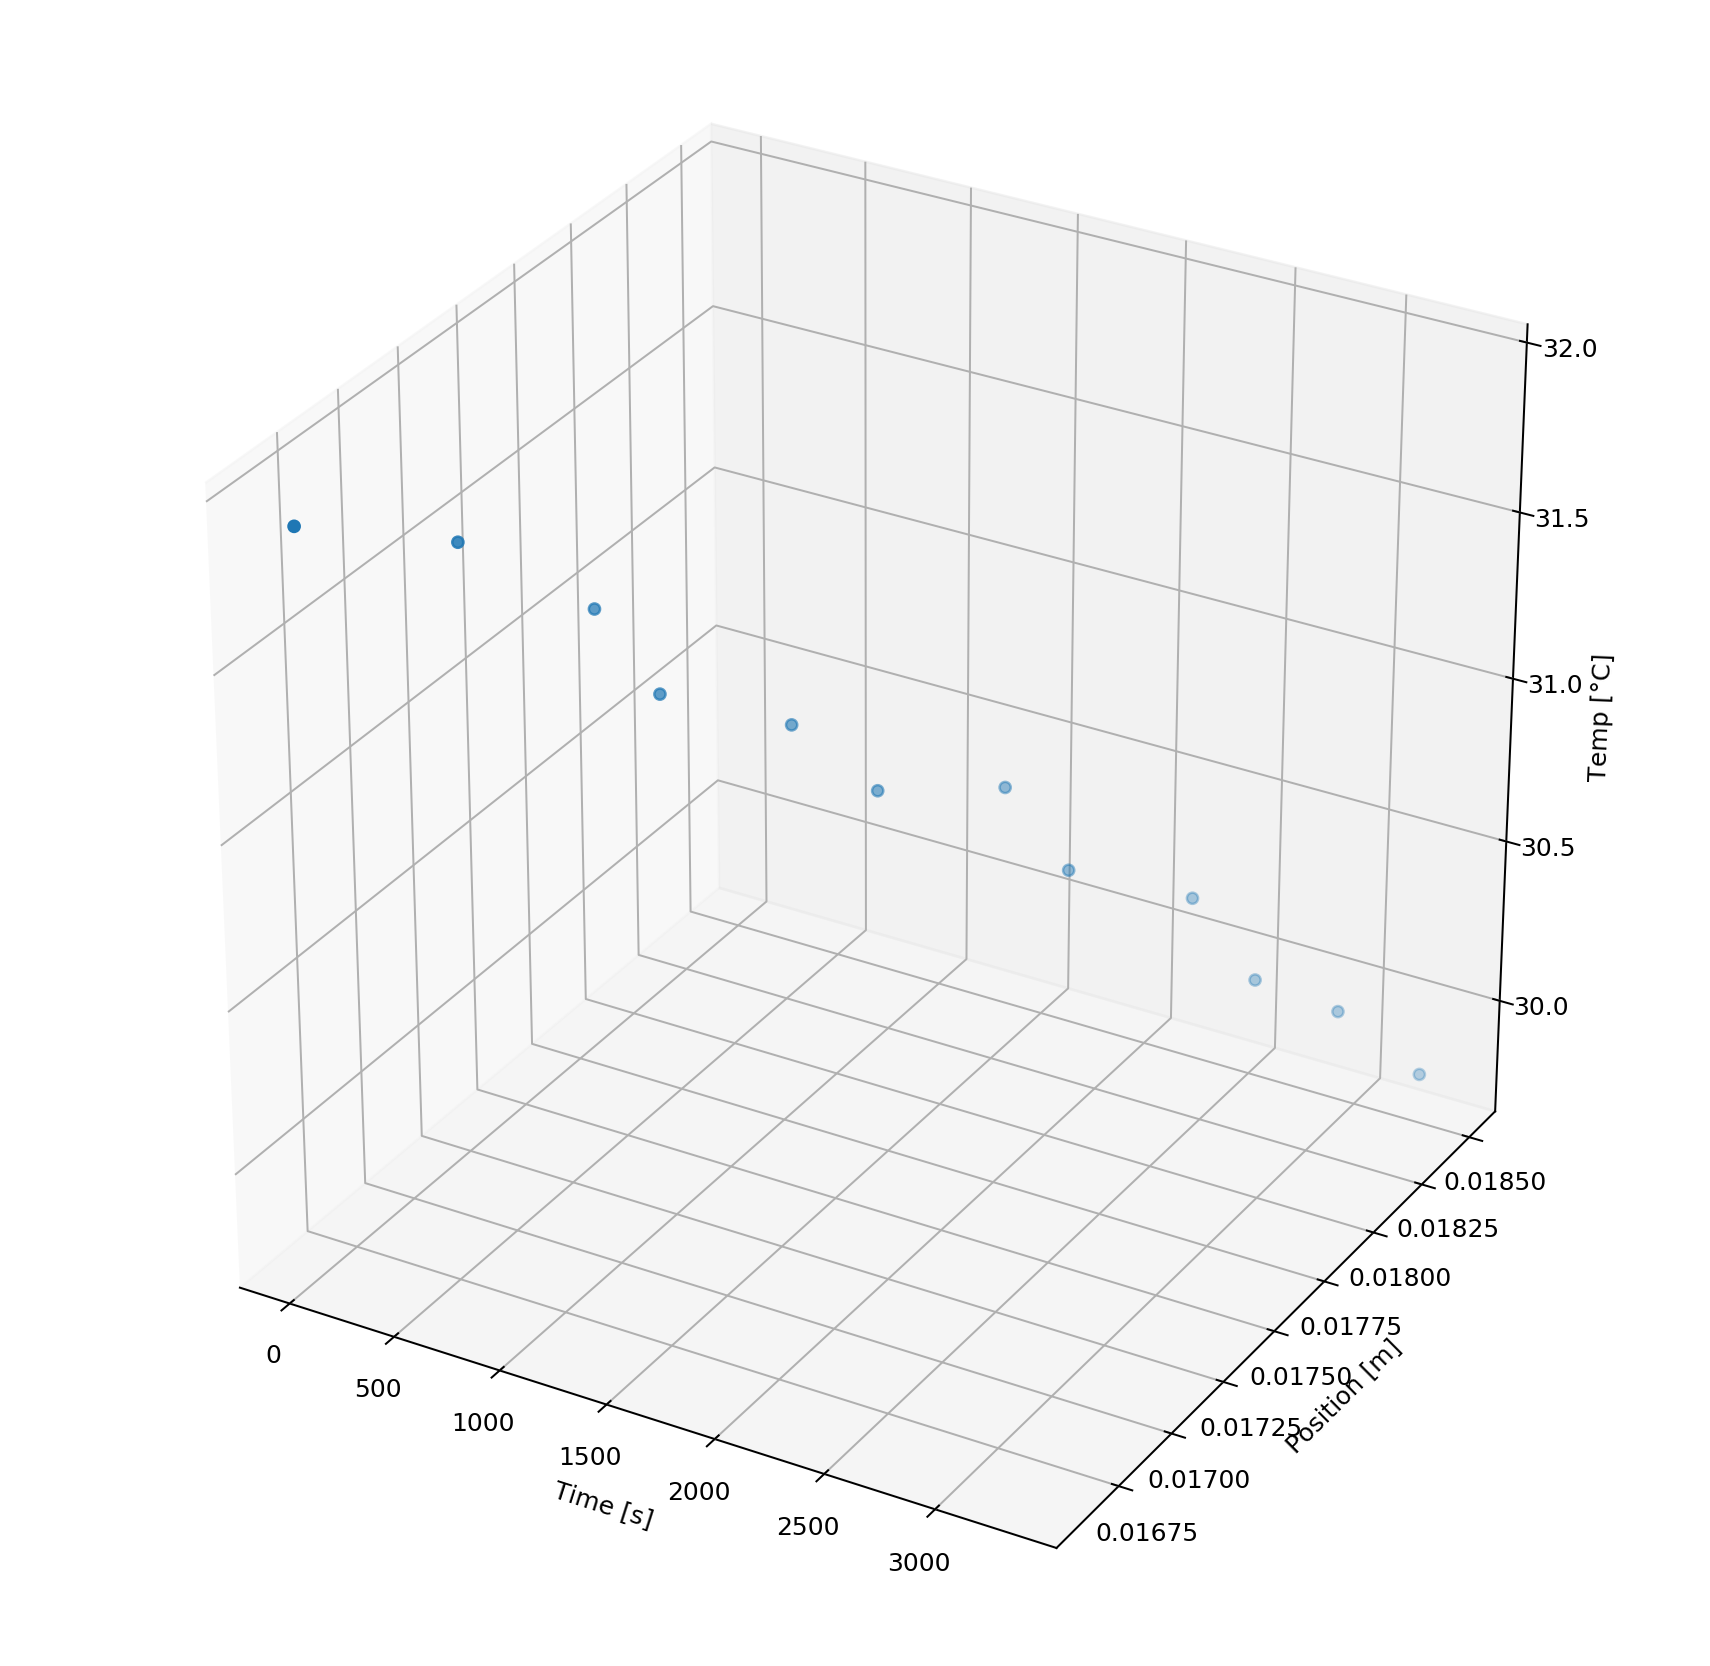

In [30]:
fig = plt.figure(figsize=(20, 60), dpi=180)
ax = fig.add_subplot(projection='3d')

Z_label = 'Temp [°C]'
X_label = 'Time [s]'
Y_label = 'Position [m]'

fig = plt.figure(figsize=(12, 12), dpi=180)
ax = fig.add_subplot(projection='3d')

number_of_plots = len(df_time);


zdata = df_temp
ydata = df_pos
xdata = df_time
ax.scatter(xdata, ydata, zdata)

ax.set_xlabel(X_label)
ax.set_ylabel(Y_label)
ax.set_zlabel(Z_label)


In [31]:
# Linear Regression

In [32]:
# URL: https://realpython.com/linear-regression-in-python/

In [33]:
# [Temp in degree celsius, time in seconds]
X = [[31.9, 0],
     [31.7, 5 * 60],
     [31.4, 10 * 60],
     [31.2, 15 * 60],
     [31.0, 20 * 60],
     [30.8, 25 * 60],
     [30.7, 30 * 60],
     [30.5, 40 * 60],
     [30.3, 50 * 60],
     [30.1, 60 * 60],
     [30.0, 65 * 60],
     [29.8, 70 * 60]];


Y = df_pos;

x, y = np.array(X), np.array(Y)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# Create model and fit it
model = LinearRegression().fit(x, y)

In [36]:
# Get results
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}");

print(f"intercept: {model.intercept_}");

print(f"coefficients: {modehow l.coef_}");


SyntaxError: invalid syntax (<fstring>, line 1)

In [37]:
# Predict response
y_pred1 = model.predict(x)
print(f"predicted response:\n{y_pred1}")

predicted response:
[0.01670228 0.01689804 0.01721635 0.0174121  0.01760786 0.01780361
 0.01787681 0.01802321 0.0181696  0.018316   0.0183892  0.01858495]


In [38]:
y_pred2 = model.intercept_ + np.sum(model.coef_ * x, axis=1);
print(f"predicted response:\n{y_pred2}");

predicted response:
[0.01670228 0.01689804 0.01721635 0.0174121  0.01760786 0.01780361
 0.01787681 0.01802321 0.0181696  0.018316   0.0183892  0.01858495]


In [39]:
# Calculate the coefficient of the diffusion D

In [40]:
# From section 13.3 Measurement of Diffusivity in 
# CENG0003 Notes 13 Mic Bal Eq 

# Winkelmann (1884) or Stefaan's Method

# Data:

l_c = 5 / 1000; # Length of capillary [m]
d_c = 1 / 1000; # diameter of capillary [m]
csa_c = 3.14 * (d / 2)**2; # Cross sectional area of capillary [m^2]


NameError: name 'd' is not defined

$D = \dfrac{N_{Ay}(y_2 - y_1)}{c \cdot ln(\dfrac{1 - x_{A2}}{1 - x_{A1}})}$, $c = \dfrac{P}{RT}$, $x_{A1} = \dfrac{p_{A1}}{P}$

In [41]:
# Vapor pressure of Acetone 
# URL: https://webbook.nist.gov/cgi/cbook.cgi?ID=C67641&Mask=4

# Find Vapour pressure of Acetone by applying the Antonie's equation 

def Cal_vp_acetone(temp):
    A = 4.42448;
    B = 1312.253;
    C = -32.445;
    
    v_p = 10**(A - (B / (temp + 273 + C)));
    return v_p;

# Assume x_A = 0
# We want to find x_A2

P_sys = 1.01325; # 1 [atm] = 1.01325 [bar]


In [42]:
df_pos[-1] - df_pos[0]

0.001899999999999999

In [43]:
x_A =  [ (Cal_vp_acetone(t) / P_sys) for t in df_temp];
# See as in 13.3 Mic Bal

In [44]:
rho = 4.63 * 0.001; # from [mol / L] to [mol / m^3] value randomly selected from above URL
M_A = 58.08 / 1000; # form [g / mol] to [kg/mol]

In [45]:
N_Ay = (df_pos[-1] - df_pos[0]) * rho / M_A / 3300; # [m] * [mol / m3] * [mol / kg] / [s]

In [46]:
# 1 bar ≡ 100,000 Pa ≡ 100,000 N/m2.
P_sys *= 100000; # [ N / m2]

# [J] = [kg⋅m2⋅s−2]

In [47]:
c = P_sys / 8.314 / 293; # [J / mol]

In [48]:
D = N_Ay * (df_pos[-1] - df_pos[0]) / c / math.log(1 - x_A)

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [49]:
# Calculate_Diffusion D
D_m = np.zeros(len(x_A));

for i in range(1, len(x_A)):
    
    N_Ay = (df_pos[i] - df_pos[i-1]) * rho / M_A / 5*60;
    
    c = P_sys / 8.314 / (df_temp[i] + 273);
    
    temporary_val = N_Ay * (df_pos[i] - df_pos[i-1]) / c / math.log(1 - x_A[i]) 
    
    D_m[i] = temporary_val;

In [50]:
D_m

array([ 0.00000000e+00, -7.56429191e-09, -4.31885413e-09, -0.00000000e+00,
       -4.40537305e-09, -4.94353802e-10, -4.47122957e-09, -0.00000000e+00,
       -4.56035507e-09, -0.00000000e+00, -5.14245061e-10, -5.19325177e-10])

In [51]:
# Calculating the Diffusion Coefficient

In [3]:
def Cal_vp_acetone(temp):
    A = 4.42448;
    B = 1312.253;
    C = -32.445;
    
    v_p = 10**(A - (B / (temp + 273 + C)));
    return v_p; # [bar]

In [4]:
rho = 784 # [kg / m^3]
K = 3.8625 * 10**(-3) # [m^2 / s]
R = 8.3145 # [J / g / mol / K]
T = 40 + 273 # [K] at 40 degree Celsius
M = 58.08 / 1000 # [kg / g / mol]
P = 101300 #[Pa]
P_v = Cal_vp_acetone(40) * 100000 # [Pa] at 40 degree Celsius
y_zero = P_v / P;
y_L = 0;

In [5]:
D = - rho * K * R * T / M / P / math.log(1 - y_zero) # [J / m / s / Pa]

In [6]:
D # [J / m / s / Pa]

1.6705938827853801